In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Any results you write to the current directory are saved as output.

In [23]:
td = pd.read_csv('train.csv')
print(len(td))

15120


In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
import os
from sklearn import ensemble
import numpy as np
import pandas as pd
from sklearn import ensemble 
# from lightgbm import LGBMClassifier
# from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler

train_df=pd.read_csv("covtype.csv")[:50000]
test_df = pd.read_csv("covtype.csv")[15121:]

In [25]:
# test_id = [ ]
# for doc in test_df.Id:
#     test_id.append(doc)
    
y_train = train_df.Cover_Type
x_train = train_df.drop('Cover_Type', axis=1)
y_test = test_df.Cover_Type
test_df = test_df.drop('Cover_Type', axis=1)
# x_train = x_train.drop('Id',axis=1)
# test_df = test_df.drop('Id',axis=1)

x_train = x_train.drop('Soil_Type8',axis=1)
x_train = x_train.drop('Soil_Type7',axis=1)
x_train = x_train.drop('Soil_Type15',axis=1)
x_train = x_train.drop('Soil_Type25',axis=1)

# x_train = x_train.drop('Hillshade_3pm',axis=1)
# x_train = x_train.drop('Hillshade_Noon',axis=1)
# x_train = x_train.drop('Hillshade_9am',axis=1)
# x_train = x_train.drop('Slope',axis=1)
# x_train = x_train.drop('Aspect',axis=1)

test_df = test_df.drop('Soil_Type7',axis=1)
test_df = test_df.drop('Soil_Type15',axis=1)
test_df = test_df.drop('Soil_Type25',axis=1)
test_df = test_df.drop('Soil_Type8',axis=1)

# test_df = test_df.drop('Hillshade_9am',axis=1)
# test_df = test_df.drop('Hillshade_Noon',axis=1)
# test_df = test_df.drop('Hillshade_3pm',axis=1)
# test_df = test_df.drop('Slope',axis=1)
# test_df = test_df.drop('Aspect',axis=1)

# x_train['Elevation1'] = x_train['Elevation']
x_train['HF1'] = x_train['Horizontal_Distance_To_Hydrology']+x_train['Horizontal_Distance_To_Fire_Points']
x_train['HF2'] = x_train['Horizontal_Distance_To_Hydrology']-x_train['Horizontal_Distance_To_Fire_Points']
x_train['HR1'] = x_train['Horizontal_Distance_To_Hydrology']+x_train['Horizontal_Distance_To_Roadways']
x_train['HR2'] = x_train['Horizontal_Distance_To_Hydrology']-x_train['Horizontal_Distance_To_Roadways']
x_train['FR1'] = x_train['Horizontal_Distance_To_Fire_Points']+x_train['Horizontal_Distance_To_Roadways']
x_train['FR2'] = x_train['Horizontal_Distance_To_Fire_Points']-x_train['Horizontal_Distance_To_Roadways']

x_train['Neg_Elevation_Vertical'] = x_train['Elevation']-x_train['Vertical_Distance_To_Hydrology']
x_train['Elevation_Vertical'] = x_train['Elevation'] + x_train['Vertical_Distance_To_Hydrology']

x_train['distance'] = np.sqrt(np.array(x_train['Horizontal_Distance_To_Hydrology']**2 + x_train["Vertical_Distance_To_Hydrology"]**2))
x_train['Mean_Amenities']=(x_train['Horizontal_Distance_To_Fire_Points'] + x_train['Horizontal_Distance_To_Hydrology'] + x_train['Horizontal_Distance_To_Roadways']) / 3 
#Mean Distance to Fire and Water 
x_train['mean_hillshade'] = (x_train['Hillshade_9am']  + x_train['Hillshade_Noon']  + x_train['Hillshade_3pm'] ) / 3
## hillshade xxx
x_train['Slope-9'] = x_train['Hillshade_9am']  - x_train['Slope'] 
x_train['Slope-n'] = x_train['Hillshade_3pm']  - x_train['Slope'] 
x_train['Slope-3'] = x_train['Hillshade_Noon']  - x_train['Slope'] 
x_train['Aspect-9'] = x_train['Hillshade_9am']  - x_train['Aspect'] 
x_train['Aspect-n'] = x_train['Hillshade_3pm']  - x_train['Aspect'] 
x_train['Aspect-3'] = x_train['Hillshade_Noon']  - x_train['Aspect'] 



# x_train["Vertical_Distance_To_Hydrology"] = abs(x_train['Vertical_Distance_To_Hydrology'])

x_train['Mean_HorizontalHydrology_HorizontalFire'] = (x_train['Horizontal_Distance_To_Hydrology']+x_train['Horizontal_Distance_To_Fire_Points'])/2
x_train['Mean_HorizontalHydrology_HorizontalRoadways'] = (x_train['Horizontal_Distance_To_Hydrology']+x_train['Horizontal_Distance_To_Roadways'])/2
x_train['Mean_HorizontalFire_Points_HorizontalRoadways'] = (x_train['Horizontal_Distance_To_Fire_Points']+x_train['Horizontal_Distance_To_Roadways'])/2

x_train['MeanNeg_Mean_HorizontalHydrology_HorizontalFire'] = (x_train['Horizontal_Distance_To_Hydrology']-x_train['Horizontal_Distance_To_Fire_Points'])/2
x_train['MeanNeg_HorizontalHydrology_HorizontalRoadways'] = (x_train['Horizontal_Distance_To_Hydrology']-x_train['Horizontal_Distance_To_Roadways'])/2
x_train['MeanNeg_HorizontalFire_Points_HorizontalRoadways'] = (x_train['Horizontal_Distance_To_Fire_Points']-x_train['Horizontal_Distance_To_Roadways'])/2


# x_train['angle'] = x_train['Slope'] * x_train['Elevation']

# test_df['Elevation1'] = test_df['Elevation']
test_df['HF1'] = test_df['Horizontal_Distance_To_Hydrology']+test_df['Horizontal_Distance_To_Fire_Points']
test_df['HF2'] = test_df['Horizontal_Distance_To_Hydrology']-test_df['Horizontal_Distance_To_Fire_Points']
test_df['HR1'] = test_df['Horizontal_Distance_To_Hydrology']+test_df['Horizontal_Distance_To_Roadways']
test_df['HR2'] = test_df['Horizontal_Distance_To_Hydrology']-test_df['Horizontal_Distance_To_Roadways']
test_df['FR1'] = test_df['Horizontal_Distance_To_Fire_Points']+test_df['Horizontal_Distance_To_Roadways']
test_df['FR2'] = test_df['Horizontal_Distance_To_Fire_Points']-test_df['Horizontal_Distance_To_Roadways']
test_df['Neg_Elevation_Vertical'] = test_df['Elevation']-test_df['Vertical_Distance_To_Hydrology']
test_df['Elevation_Vertical'] = test_df['Elevation'] + test_df['Vertical_Distance_To_Hydrology']

test_df['distance'] = np.sqrt(np.array(test_df['Horizontal_Distance_To_Hydrology']**2 + test_df["Vertical_Distance_To_Hydrology"]**2))
test_df['Mean_Amenities']=(test_df['Horizontal_Distance_To_Fire_Points'] + test_df['Horizontal_Distance_To_Hydrology'] + test_df['Horizontal_Distance_To_Roadways']) / 3 
#Mean Distance to Fire and Water 
test_df['mean_hillshade'] = (test_df['Hillshade_9am']  + test_df['Hillshade_Noon']  + test_df['Hillshade_3pm'] ) / 3
test_df['Slope-9'] = test_df['Hillshade_9am']  - test_df['Slope'] 
test_df['Slope-n'] = test_df['Hillshade_3pm']  - test_df['Slope'] 
test_df['Slope-3'] = test_df['Hillshade_Noon']  - test_df['Slope'] 
test_df['Aspect-9'] = test_df['Hillshade_9am']  - test_df['Aspect'] 
test_df['Aspect-n'] = test_df['Hillshade_3pm']  - test_df['Aspect'] 
test_df['Aspect-3'] = test_df['Hillshade_Noon']  - test_df['Aspect'] 



# test_df["Vertical_Distance_To_Hydrology"] = abs(test_df['Vertical_Distance_To_Hydrology'])
test_df['Mean_HorizontalHydrology_HorizontalFire'] = (test_df['Horizontal_Distance_To_Hydrology']+test_df['Horizontal_Distance_To_Fire_Points'])/2
test_df['Mean_HorizontalHydrology_HorizontalRoadways'] = (test_df['Horizontal_Distance_To_Hydrology']+test_df['Horizontal_Distance_To_Roadways'])/2
test_df['Mean_HorizontalFire_Points_HorizontalRoadways'] = (test_df['Horizontal_Distance_To_Fire_Points']+test_df['Horizontal_Distance_To_Roadways'])/2

test_df['MeanNeg_Mean_HorizontalHydrology_HorizontalFire'] = (test_df['Horizontal_Distance_To_Hydrology']-test_df['Horizontal_Distance_To_Fire_Points'])/2
test_df['MeanNeg_HorizontalHydrology_HorizontalRoadways'] = (test_df['Horizontal_Distance_To_Hydrology']-test_df['Horizontal_Distance_To_Roadways'])/2
test_df['MeanNeg_HorizontalFire_Points_HorizontalRoadways'] = (test_df['Horizontal_Distance_To_Fire_Points']-test_df['Horizontal_Distance_To_Roadways'])/2
# test_df['angle'] = test_df['Slope'] * test_df['Elevation']


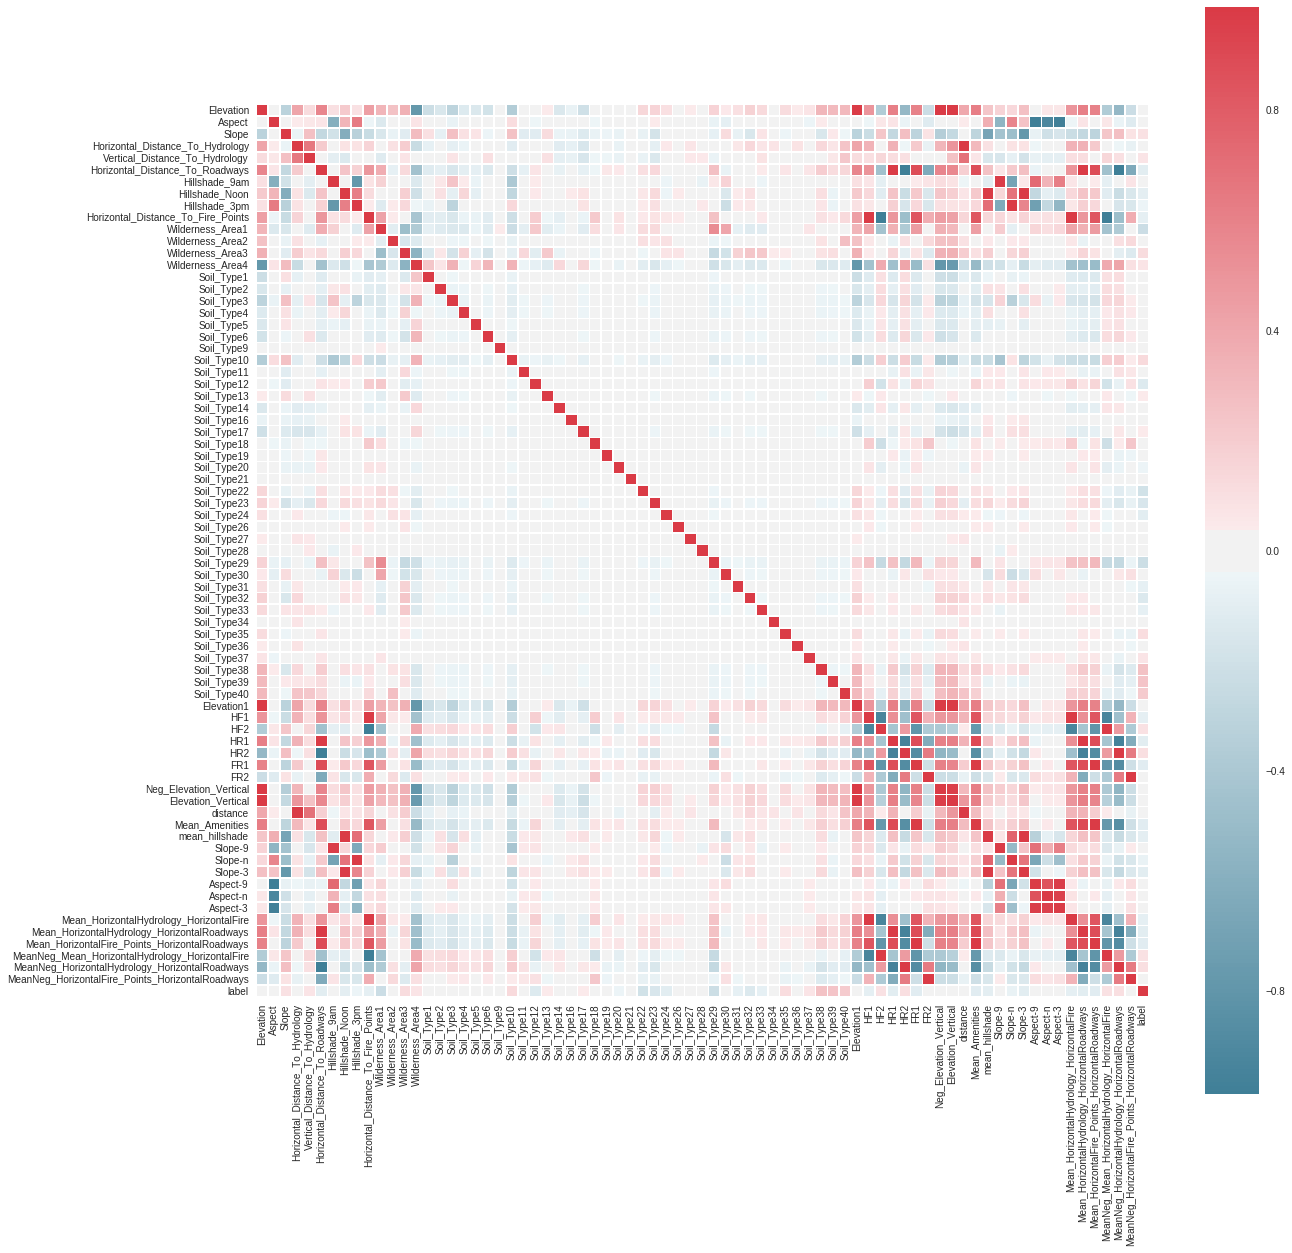

In [17]:
# corr plot## corr 
# x_train['label'] = y_train
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
corr = x_train.corr()
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(225, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)
plt.show()

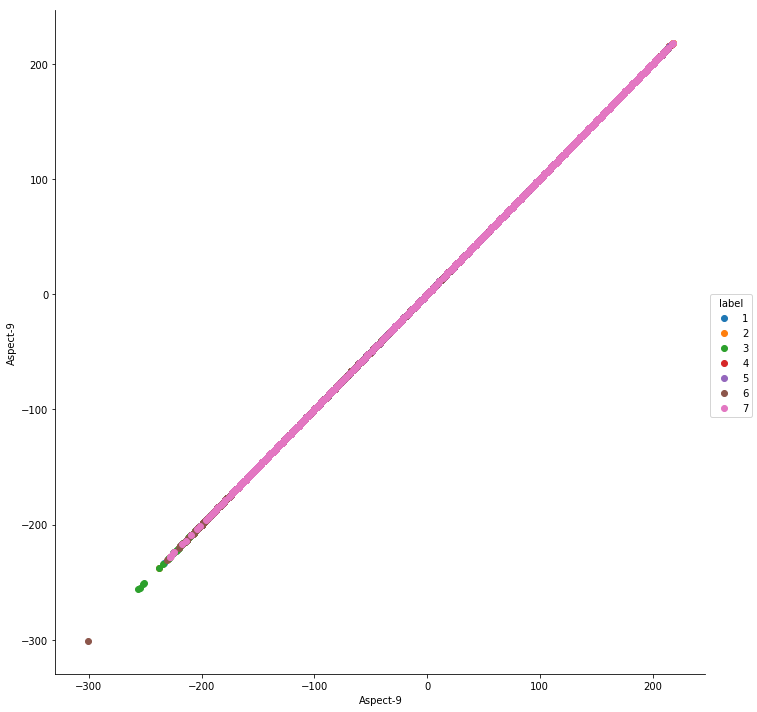

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
temp = train[['Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Cover_Type']]
plt.figure(figsize=(15,11))
parallel_coordinates(temp,'label', colormap=plt.get_cmap("Set1"))
plt.title("parallel plots of Hillshade with forest categories")
plt.xlabel("Hillshade")
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
# # scaler = MinMaxScaler(feature_range=(-100,100))
scaler = StandardScaler()
x_scale = scaler.fit_transform(x_train)

In [17]:
from sklearn.cross_validation import train_test_split
x, x_test, y, y_test = train_test_split(x_train, y_train , random_state = 0,test_size=0.2)

In [26]:
%%time

m1 = ensemble.AdaBoostClassifier(ensemble.ExtraTreesClassifier(n_estimators=1050), n_estimators=550, learning_rate=0.1, algorithm='SAMME')  
m1.fit(x_train, y_train) 
print('Training Accuracy: {}%'.format(m1.score(x_train,y_train)*100))
print ('Testing Accuracy: {}%'.format(m1.score(test_df,y_test)*100))

Training Accuracy: 100.0%
Testing Accuracy: 81.52011606475452%
CPU times: user 3min 5s, sys: 10.8 s, total: 3min 16s
Wall time: 3min 29s


In [27]:
%%time
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_estimators=1550)
# model = BaggingClassifier(m)
m.fit(x_train, y_train) 
print('Training Accuracy: {}%'.format(m.score(x_train,y_train)*100))
print ('Testing Accuracy: {}%'.format(m.score(test_df,y_test)*100))

Training Accuracy: 100.0%
Testing Accuracy: 78.39990386841282%
CPU times: user 5min 54s, sys: 13.9 s, total: 6min 8s
Wall time: 6min 21s


In [28]:
%%time
from sklearn.ensemble import BaggingClassifier
m2 = ensemble.ExtraTreesClassifier(n_estimators=950)
# model = BaggingClassifier(m2, max_samples=0.8, max_features=0.8)
m2.fit(x_train, y_train) 
print('Training Accuracy: {}%'.format(m2.score(x_train,y_train)*100))
print ('Testing Accuracy: {}%'.format(m2.score(test_df,y_test)*100))

Training Accuracy: 100.0%
Testing Accuracy: 81.49625988043634%
CPU times: user 2min 26s, sys: 8.64 s, total: 2min 34s
Wall time: 2min 38s


In [29]:
import pandas as pd
feature_importances = pd.DataFrame(m.feature_importances_,
                                   index = x.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.head(70)

NameError: name 'x' is not defined

### GridSearchCV
using grid search to find the best parameters

In [18]:
%%time
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
tuned_parameters = [{'n_estimators': [450,550]}]


 
print("# Tuning hyper-parameters for Accuracy")
print()

clf = GridSearchCV(ensemble.AdaBoostClassifier(ensemble.ExtraTreesClassifier(n_estimators=1050)), tuned_parameters, cv=5)
clf.fit(x, y)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
          % (mean_score, scores.std() * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(x_test)
print(classification_report(y_true, y_pred))


# Tuning hyper-parameters for Accuracy

Best parameters set found on development set:

{'n_estimators': 450}

Grid scores on development set:

0.892 (+/-0.010) for {'n_estimators': 450}
0.892 (+/-0.011) for {'n_estimators': 550}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          1       0.85      0.80      0.83       439
          2       0.81      0.77      0.79       411
          3       0.84      0.87      0.86       418
          4       0.94      0.97      0.95       438
          5       0.92      0.96      0.94       428
          6       0.91      0.88      0.89       471
          7       0.95      0.97      0.96       419

avg / total       0.89      0.89      0.89      3024

CPU times: user 2min 23s, sys: 1.47 s, total: 2min 25s
Wall time: 2min 25s


In [16]:
%%time
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
m = LogisticRegression()
# model = BaggingClassifier(m, max_samples=0.5, max_features=0.5)
model = AdaBoostClassifier(m, learning_rate=0.1,n_estimators=100)
model.fit(x,y) 
print('Training Accuracy: {}%'.format(model.score(x,y)*100))
print ('Testing Accuracy: {}%'.format(model.score(x_test,y_test)*100))

Training Accuracy: 54.44775132275132%
Testing Accuracy: 55.588624338624335%
Wall time: 3min 49s


In [29]:
%%time
from lightgbm import LGBMClassifier
m3 = LGBMClassifier(n_estimators=2000)
m3.fit(x, y)
print('Training Accuracy: {}%'.format(m3.score(x,y)*100))
print ('Testing Accuracy: {}%'.format(m3.score(x_test,y_test)*100))

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training Accuracy: 100.0%
Testing Accuracy: 88.78968253968253%
Wall time: 34.2 s


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [35]:
%%time
print ("training on data ... ")
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

model=VotingClassifier(estimators=[('clf1', ensemble.ExtraTreesClassifier(n_estimators=950)),
#                                    ('clf2', LogisticRegression()),
                                  ('clf3',XGBClassifier( learning_rate =0.1,
                                             n_estimators=400,
                                             max_depth=25,
                                             min_child_weight=1,
                                             gamma=1,
                                             subsample=0.8,
                                             colsample_bytree=0.8,
                                             objective= 'multi:softmax',
                                             nthread=4,
                                             scale_pos_weight=1,
                                             seed=27))], voting='soft',weights=[3,1])

model.fit(x, y)

print('Training Accuracy: {}%'.format(model.score(x,y)*100))
print ('Testing Accuracy: {}%'.format(model.score(x_test,y_test)*100))

training on data ... 


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training Accuracy: 100.0%
Testing Accuracy: 88.98809523809523%
Wall time: 1min 18s


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [13]:

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPool1D, GlobalAveragePooling1D, BatchNormalization
from keras.optimizers import RMSprop, SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


Using TensorFlow backend.


In [14]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
y = to_categorical(y_train, num_classes=8)
random_seed = 2
# scaler = MinMaxScaler(feature_range=(-10,10))
scaler = StandardScaler()
x_scale = scaler.fit_transform(x_train)
test_scale = scaler.transform(test_df)
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(x_scale, y, test_size = 0.2, random_state=random_seed)

In [24]:
model = Sequential()
model.add(Dense(128, activation='tanh', input_shape=(66,)))
model.add(Dense(128, activation = "tanh"))
model.add(Dropout(0.2))
model.add(Dense(64, activation = "tanh"))
model.add(Dense(64, activation = "tanh"))
model.add(Dense(32, activation = "tanh"))
model.add(Dense(32, activation = "tanh"))
model.add(Dropout(0.5))
model.add(Dense(8, activation = "sigmoid"))

In [25]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=1e-04)
optimizer1 = Adam(lr=0.001, decay=1e-4)
optimizer2 = SGD(lr=0.1, decay=1e-4)
model.compile(optimizer = optimizer1 , loss = "categorical_crossentropy", metrics=["accuracy"])
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=0.01, 
                                            verbose=1, 
                                            factor=0.05, 
                                            min_lr=0.0001)
earlystopping = EarlyStopping(monitor='val_acc', patience=0.001, verbose=1, mode='auto')

In [26]:
history = model.fit(X_train, Y_train,
                      epochs=100,
                      batch_size=256,
                      validation_data=(X_val, Y_val),verbose=1)

Train on 12096 samples, validate on 3024 samples
Epoch 1/100
12096/12096 [==============================] - 1s 50us/step - loss: 1.6565 - acc: 0.4322 - val_loss: 1.3919 - val_acc: 0.5982
Epoch 2/100
12096/12096 [==============================] - 0s 19us/step - loss: 1.3590 - acc: 0.5112 - val_loss: 1.1834 - val_acc: 0.6009
Epoch 3/100
12096/12096 [==============================] - 0s 18us/step - loss: 1.2013 - acc: 0.5365 - val_loss: 1.0216 - val_acc: 0.6478
Epoch 4/100
12096/12096 [==============================] - 0s 18us/step - loss: 1.0744 - acc: 0.5872 - val_loss: 0.8893 - val_acc: 0.6766
Epoch 5/100
12096/12096 [==============================] - 0s 18us/step - loss: 0.9790 - acc: 0.6316 - val_loss: 0.7996 - val_acc: 0.7007
Epoch 6/100
12096/12096 [==============================] - 0s 17us/step - loss: 0.9048 - acc: 0.6562 - val_loss: 0.7366 - val_acc: 0.7183
Epoch 7/100
12096/12096 [==============================] - 0s 18us/step - loss: 0.8576 - acc: 0.6687 - val_loss: 0.6998 - v

In [ ]:
# predict results
results = model.predict(test_scale)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)


In [ ]:
results